In [17]:
import json
import gzip
import pandas as pd
from lxml import html  
import csv,os,json
import requests
from time import sleep
import random
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [18]:
path = "Software_5.json"
data_df = pd.read_json(path, lines=True)

In [4]:
data_df=data_df.rename(columns = {'overall':'Rating', 'reviewerID':'UserID', 'asin':'ProductID'})
data_df.drop("style", axis=1)
data_df

,Rating,verified,reviewTime,UserID,ProductID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN
5,5,False,"09 26, 2010",A2BVNVJOFXGZUB,0321719816,{'Format:': ' DVD-ROM'},J. Howard,The video is well-paced and delivered in an un...,Excellent.,1285459200,NaN,NaN
6,5,False,"04 7, 2011",A2JMJVNTBL7K7E,0321719816,{'Format:': ' DVD-ROM'},Yesuaini99,I spent several hours on the lesson and I love...,excellent video training material,1302134400,NaN,NaN
7,5,False,"01 8, 2011",A14JBDSWKPKTZA,0321719816,{'Format:': ' DVD-ROM'},Bob Feeser,I have had Dreamweaver MX2004 since it came ou...,Great Video for a Difficult at Times Program,1294444800,NaN,NaN
8,5,False,"10 28, 2010",A2WCFDOCS73PNB,0321719816,{'Format:': ' DVD-ROM'},Gadgetman,I have also taken a local community college on...,Excellent value for the price,1288224000,4,NaN
9,5,False,"10 28, 2010",A14638TGYH7GD9,0321719816,{'Format:': ' DVD-ROM'},Rebecca Haden,Even though I use Dreamweaver a great deal and...,Buy this with your copy of Dreamweaver,1288224000,6,NaN


In [5]:
path_2 = 'Software.csv'
df_small = pd.read_csv(path_2, names=["ProductID", "UserID", "Rating"])
df_small

,ProductID,UserID,Rating
0,0077613252,A240ORQ2LF9LUI,4.0
1,0077613252,A1YCCU0YRLS0FE,4.0
2,0077613252,A1BJHRQDYVAY2J,1.0
3,0077613252,APRDVZ6QBIQXT,3.0
4,0077775473,A2JZTTBSLS1QXV,5.0
5,0132147556,AGN3T5ERYJN5A,4.0
6,0132147556,AHPK2GD0SQC59,3.0
7,0132147556,A35UC8LHA6TILH,5.0
8,0132147556,A2IH0AJPR7IWG3,5.0
9,0132147556,AL87GELNJGOH3,5.0


In [14]:
merged_df = data_df.merge(df_small)

,Rating,verified,reviewTime,UserID,ProductID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14838,4,False,"07 16, 2016",A1E50L7PCVXLN4,B01FFVDY9M,{'Platform:': ' Key Card'},Colinda,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN,NaN
14839,3,False,"06 17, 2017",AVU1ILDDYW301,B01HAP3NUG,NaN,G. Hearn,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN,NaN
14840,4,False,"01 24, 2017",A2LW5AL0KQ9P1M,B01HAP3NUG,NaN,Dr. E,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN,NaN
14841,3,False,"06 14, 2018",AZ515FFZ7I2P7,B01HAP47PQ,{'Platform:': ' PC Disc'},Jerry Jackson Jr.,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN,NaN


In [6]:
def parse_amz(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    while True:
            sleep(random.randint(10,15))
            try:
                title = soup.find(id="productTitle").get_text().strip()
                price = soup.find(id="priceblock_ourprice").get_text()
                converted_price = float(price[0:5])

                if page.status_code != 200:
                    raise ValueError('captha')

                data = { 'Name':title, 
                         'Price':price,
                         'Adjusted_price':converted_price}
                return data 
            except Exception as e:
                print(e)
            continue
                
def read_asins():
    # insert the real list from dataframe here!!!!!!!!!!!
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}
    asin_list = ['0321719816', '0077613252']
    extracted_data = []
    for i in asin_list:
        url = "http://www.amazon.com/dp/" + i 
        print ("Processing: "+url)
        extracted_data.append(parse_amz(url))
        sleep(random.randint(10,100))
    f=open('data.json','w')
    json.dump(extracted_data,f,indent=4)

In [7]:
################### Data Exploration #######################
print(df_small.dtypes, "\n")
print(df_small.info(), "\n")
print("Description of the Rating column:", "\n", df_small.describe()['Rating'])

ProductID     object
UserID        object
Rating       float64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 3 columns):
ProductID    459436 non-null object
UserID       459436 non-null object
Rating       459436 non-null float64
dtypes: float64(1), object(2)
memory usage: 10.5+ MB
None 

Description of the Rating column: 
 count    459436.000000
mean          3.570175
std           1.626662
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64


In [8]:
##### Check for NA's ###########
df_small.isna().sum()

ProductID    0
UserID       0
Rating       0
dtype: int64

In [13]:
# Rating counts
df_small.groupby(['Rating']).size().plot.bar()
plt.show()


In [14]:
# user id review counts 
rated_products_per_user = df_small.groupby(by='UserID')['Rating'].count().sort_values(ascending=False)
print(rated_products_per_user, "\n", "\n", rated_products_per_user.describe())

UserID
A5JLAU2ARJ0BO           73
A680RUE1FDO8B           71
A225G2TFM76GYX          69
A3W4D8XOGLWUN5          68
A15S4XW3CRISZ5          66
                        ..
A3FLUNWZ1P37UW           1
A3FLUOIZPA5KSB           1
A3FLUTCXZ8HCUN           1
A3FLVZRU40GOND           1
A00577669P2XCLU956L8     1
Name: Rating, Length: 375147, dtype: int64 
 
 count    375147.000000
mean          1.224683
std           0.891902
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          73.000000
Name: Rating, dtype: float64


In [15]:
heavy_users = df_small.groupby(by='UserID')['Rating'].count()

In [12]:
# Top 5 Users
heavy_users.sort_values(ascending=False).head()

UserID
A5JLAU2ARJ0BO     73
A680RUE1FDO8B     71
A225G2TFM76GYX    69
A3W4D8XOGLWUN5    68
A15S4XW3CRISZ5    66
Name: Rating, dtype: int64

In [13]:
# Same but for product ids
df_small.groupby('ProductID')['Rating'].mean().sort_values(ascending=False).head()

ProductID
B01HJAMWOK    5.0
B002JAT2S0    5.0
B002E8EREQ    5.0
B002EXYP48    5.0
B002FD3688    5.0
Name: Rating, dtype: float64

In [14]:
#Total no of rating for product
df_small.groupby('ProductID')['Rating'].count().sort_values(ascending=False).head()

ProductID
B00UB76290    8994
B00CTTEKJW    7939
B00NG7JVSQ    6395
B00H9A60O4    4730
B00E6LJ2SA    4048
Name: Rating, dtype: int64

In [18]:
ratings_mean_count = pd.DataFrame(df_small.groupby('ProductID')['Rating'].mean())

In [19]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_small.groupby('ProductID')['Rating'].count())

In [20]:
# Popularity based recom

ratings_mean_count.sort_values(by='rating_counts', ascending=False)

,Rating,rating_counts
ProductID,,
B00UB76290,4.231043,8994
B00CTTEKJW,3.746819,7939
B00NG7JVSQ,3.418765,6395
B00H9A60O4,4.076533,4730
B00E6LJ2SA,3.269516,4048
...,...,...
B0019QT0WI,5.000000,1
B0019S3504,1.000000,1
B0019S4NU0,1.000000,1


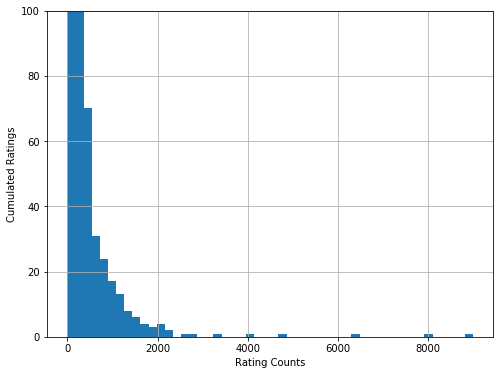

In [29]:
# Verteilung der Rating_Counts
# comment first bin 
plt.figure(figsize=(8,6))
ratings_mean_count['rating_counts'].hist(bins=50)
plt.xlabel('Rating Counts')
plt.ylabel('Cumulated Ratings')
plt.ylim(0,100)
plt.show()

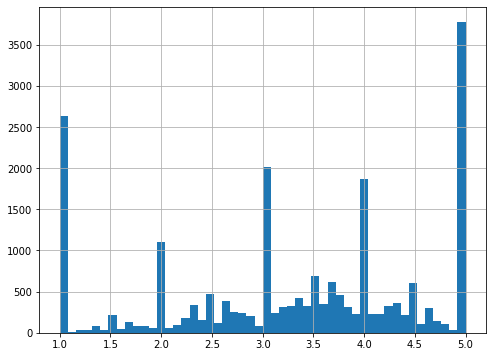

In [31]:
# Verteilung der Ratings (Histogram)
plt.figure(figsize=(8,6))
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

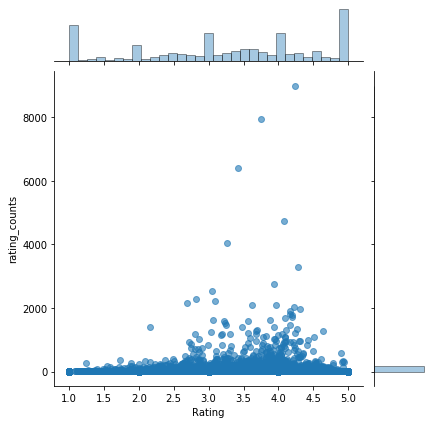

In [20]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.6)

In [34]:
most_popular_products = pd.DataFrame(df_small.groupby('ProductID')['Rating'].count()).sort_values('Rating', ascending=False).head(20)
most_popular_products

,Rating
ProductID,
B00UB76290,8994
B00CTTEKJW,7939
B00NG7JVSQ,6395
B00H9A60O4,4730
B00E6LJ2SA,4048
B00EZPXYP4,3304
B015724OVG,2745
B008RA5A00,2525
B00MYXTCGY,2271


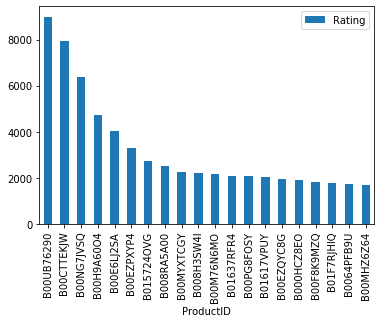

In [35]:
most_popular_products.plot.bar()

In [39]:
# Need to account for weighted average
score_matrix = ratings_mean_count.sort_values(by='rating_counts', ascending=False)
# Hyperparameter C and m 
C = score_matrix['Rating'].mean()
#Adjust for different ratings
m = score_matrix['rating_counts'].quantile(0.90)

# v = number of votes for the movie 
# m = minimum votes required to be listed in the chart
# R = average rating of the movie 
# C = mean vote across the whole report 

def weighted_rating(x, m=m, C=C):
    v = x['rating_counts']
    R = x['Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

score_matrix['score'] = score_matrix.apply(weighted_rating, axis=1)
score_matrix.sort_values('score', ascending=False)

,Rating,rating_counts,score
ProductID,,,
B0000AZJY6,4.897924,578,4.822159
B000050ZRE,4.937908,306,4.797166
B000EORV8Q,4.929012,324,4.796178
B0001FS9NE,4.915309,307,4.776937
B005CSF1JK,4.787645,259,4.639065
...,...,...,...
B000LJYUW4,1.515789,95,1.935893
B0002LXRXY,1.589147,129,1.905385
B00006ULHT,1.724432,352,1.845278


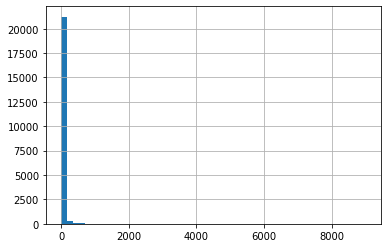

In [40]:
# Vergleich der Metriken Rating Counts, Rating und der neu gebauten Metric Score
# Als letztes dann noch Cross-Tab von jeweils zwei Metriken 

score_matrix['rating_counts'].hist(bins=50)

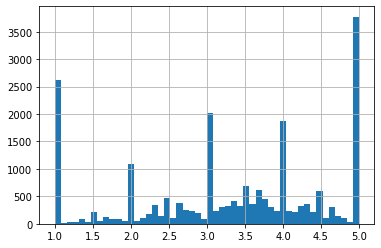

In [41]:
score_matrix['Rating'].hist(bins=50)

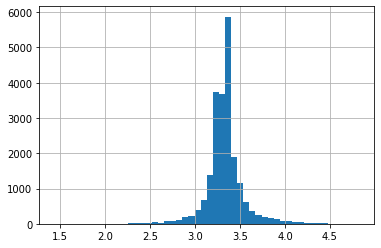

In [42]:
# Distribution of score
score_matrix['score'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

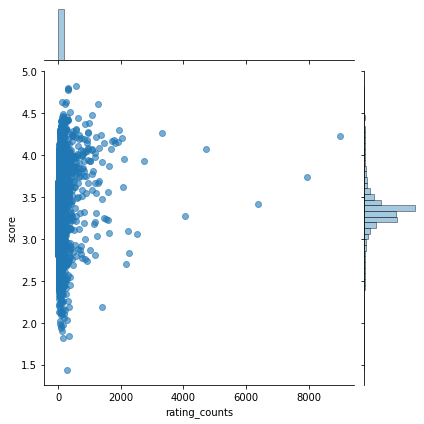

In [27]:
####### Rating counts vs Score #####################
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating_counts', y='score', data=score_matrix, alpha=0.6)

<Figure size 576x432 with 0 Axes>

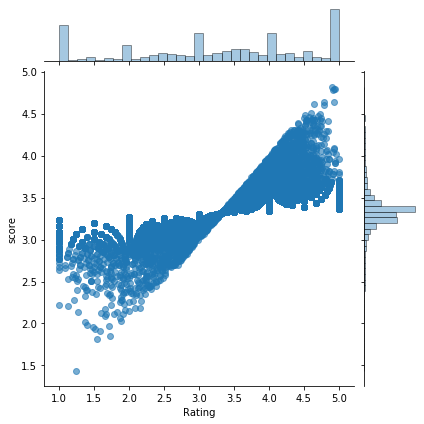

In [28]:
####### Rating vs Score #####################
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='score', data=score_matrix, alpha=0.6)

In [44]:
# Wrap it up in a class object making it reproducible


class Simple_recom():
    def __init__(self):
        self.dataframe = None
        self.user_id = None
        self.product_id = None
        self.rating = None
        self.popularity_recommendations = None

    def create(self, dataframe, user_id, product_id, rating):
        self.dataframe = dataframe
        self.user_id = user_id
        self.product_id = product_id
        self.rating = rating

        ratings_mean_count = pd.DataFrame(self.dataframe.groupby(self.product_id)[self.rating].mean())
        ratings_mean_count['rating_counts'] = pd.DataFrame(self.dataframe.groupby(self.product_id)[self.rating].count())
        ratings_mean_count.sort_values(by='rating_counts', ascending=False)

        # Need to account for weighted average
        score_matrix = ratings_mean_count.sort_values(by='rating_counts', ascending=False)
        C = score_matrix['Rating'].mean()
        m = score_matrix['rating_counts'].quantile(0.90)

        # v = number of votes for the movie
        # m = minimum votes required to be listed in the chart
        # R = average rating of the movie
        # C = mean vote across the whole report

        def weighted_rating(x, m=m, C=C):
            v = x['rating_counts']
            R = x['Rating']
            return (v/(v+m) * R) + (m/(m+v) * C)

        score_matrix['score'] = score_matrix.apply(weighted_rating, axis=1)
        score_matrix = score_matrix.reset_index()
        score_matrix_sort = score_matrix.sort_values('score', ascending=False)
        # Top 20 Products for recommendation
        score_matrix_sort['Rank'] = score_matrix_sort['score'].rank(ascending=0, method='first')
        self.popularity_recommendations = score_matrix_sort.head(10)
        return self.popularity_recommendations

    def predict(self, user_id, user_index):
        users = self.dataframe[self.user_id].unique()
        user_index = users[user_index]
        user_recommendations = self.popularity_recommendations

        #New Column for Unique User ID
        user_recommendations['user_id'] = user_index

        #Change order of columns
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]

        return user_recommendations

In [46]:
pm = Simple_recom()
pm.create(df_small, 'UserID', 'ProductID', 'Rating')
pm.predict('UserID', 7)

# Use merged df to add random review text 

,user_id,ProductID,Rating,rating_counts,score,Rank
0,A2JMJVNTBL7K7E,B0000AZJY6,4.930435,920,4.892611,1.0
1,A2JMJVNTBL7K7E,B000EORV8Q,4.934426,244,4.802519,2.0
2,A2JMJVNTBL7K7E,B000050ZRE,4.933333,240,4.799583,3.0
3,A2JMJVNTBL7K7E,B0001FS9NE,4.933333,240,4.799583,4.0
7,A2JMJVNTBL7K7E,B0148BYIAO,4.669421,121,4.480585,5.0
4,A2JMJVNTBL7K7E,B00L13X6QA,4.611765,170,4.477828,6.0
10,A2JMJVNTBL7K7E,B00EZPXYP4,4.408163,98,4.244786,7.0
32,A2JMJVNTBL7K7E,B00UB76290,4.508475,59,4.239634,8.0
99,A2JMJVNTBL7K7E,B00ZSI7Y3U,4.769231,26,4.201597,9.0
20,A2JMJVNTBL7K7E,B00F8K9MZQ,4.378378,74,4.185319,10.0


In [51]:
om = Simple_recom()
om.create(data_df, 'UserID', 'ProductID', 'Rating')
om.predict('UserID', 14)

,user_id,ProductID,Rating,rating_counts,score,Rank
0,A1E50L7PCVXLN4,B0000AZJY6,4.929204,452,4.857210,1.0
1,A1E50L7PCVXLN4,B000EORV8Q,4.931034,232,4.797925,2.0
2,A1E50L7PCVXLN4,B0001FS9NE,4.930435,230,4.796359,3.0
3,A1E50L7PCVXLN4,B000050ZRE,4.930435,230,4.796359,4.0
4,A1E50L7PCVXLN4,B00EZPXYP4,4.408163,98,4.249687,5.0
13,A1E50L7PCVXLN4,B00UB76290,4.508475,59,4.246674,6.0
5,A1E50L7PCVXLN4,B00F8K9MZQ,4.378378,74,4.190790,7.0
31,A1E50L7PCVXLN4,B0144NYGJY,4.478261,46,4.181900,8.0
69,A1E50L7PCVXLN4,B00JC5Y6WM,4.600000,30,4.163114,9.0
11,A1E50L7PCVXLN4,B00EZQYC8G,4.365079,63,4.158908,10.0


In [31]:
# Evaluate the model's performance 
class Evaluate():
    def __init__(self):
        self.train_data = None
        self.model_1 = None
        self.model_2 = None
        
    def evaluate_pop(self, model_1):
        pass
    
    def evaluate_sim(self, model_2):
        pass

In [53]:
class Item_Sim():
    def __init__(self):
        self.df = None
        self.userid = None
        self.productid = None
        self.rating = None
        self.correlation_matrix = None
        self.X = None
        
    #Creates instance of model    
    def create_model(self, df, userid, productid, rating):
        self.df = df 
        self.userid = userid
        self.productid = productid
        self.rating = rating
        return self.df
    
    #Get unique products given userid
    def get_user_items(self, user):
        user_data = self.df[self.df[self.userid] == user]
        user_products = list(user_data[self.productid].unique())
        
        return user_products
    
    #Get items reviewed by user
    def get_item_user(self, product):
        product_data = self.df[self.df[self.productid] == product]
        product_users = set(product_data[self.userid].unique())
        
        return product_users
    

    def create_corr_matrix(self):
        #Creates pivot table (sparse matrix)
        pivot_m = self.df.groupby([self.userid, self.productid])[self.rating].max().unstack()
        
        #Fills missing values with zeros 
        pivot_m = pivot_m.fillna(value=0)
        
        # Transpose pivot table
        self.X = pivot_m.T
        
        #Decomposing the Matrix
        SVD = TruncatedSVD(n_components=10)
        decomposed_matrix = SVD.fit_transform(self.X)
        
        #Correlation Matrix
        self.correlation_matrix = np.corrcoef(decomposed_matrix)
        
        return self.correlation_matrix
    
    def show_corr_matrix(self):
        #Creates pivot table (sparse matrix)
        pivot_m = self.df.groupby([self.userid, self.productid])[self.rating].max().unstack()
        
        #Fills missing values with zeros 
        pivot_m = pivot_m.fillna(value=0)
        
        return pivot_m
    
    def recommend(self, product):
        
        product_names = list(self.X.index)
        product_ID = product_names.index(product)
        correlation_product_ID = self.correlation_matrix[product_ID]
        
        recommend = list(self.X.index[correlation_product_ID > 0.65])
        #Top 20 Recommendations
        recommend = recommend[0:19]
        
        return recommend

In [33]:
#Create smaller dataframe because of memory reasons. In production level one would need to allocate data differently
df_small_sample = df_small.head(200000)
#Initializes instance of model
km = Item_Sim()
#Creates model
km.create_model(df_small_sample, 'UserID', 'ProductID', 'Rating')
#km.get_item_user('0077613252')
# Creates correlation matrix of products
km.create_corr_matrix()
# Recommends items based on item similarity 
km.recommend('0132147556')

['0132147556',
 '0955909619',
 '157231155X',
 '1579424368',
 '1596363355',
 '1931020752',
 'B00000JL62',
 'B00001KPYS',
 'B00001W0H6',
 'B00001X5C5',
 'B00001X5C7',
 'B00002EPGS',
 'B00002R2A8',
 'B00002S8OW',
 'B00002SANG',
 'B00002SFK8',
 'B00004TEY4',
 'B00004TLO0',
 'B00004U2IF']

In [54]:
#Create smaller dataframe because of memory reasons. In production level one would need to allocate data differently
df_small_sample = df_small.head(200000)
#Initializes instance of model
mm = Item_Sim()
#Creates model
mm.create_model(df_small_sample, 'UserID', 'ProductID', 'Rating')
#Show corr
mm.show_corr_matrix()

ProductID,0077613252,0077775473,0132147556,0321700945,0321719816,0321719824,0321898354,0615179088,0669524115,0669524425,...,B00E6OPE7K,B00E7XAM4K,B00E7XANU8,B00E7XBJ24,B00EAQR8I2,B00EB0F7LM,B00EDQ30TU,B00EDSI7K0,B00EDSI7QO,B00EDSI8HW
UserID,,,,,,,,,,,,,,,,,,,,,
A01783545QY522F4S8O0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0206237Y9WNDF0GWVPZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0284208PB0CNSHI1OC6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0289418QDN9OTXLUDEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0315022OKCLO1GNGIWT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZWE2QM651OL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZXPJXXADPD2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZY4E6QPTBVP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
### Gitintegration Test

def function():
    return 10

function()*2

20

In [ ]:
def another_function():
    pass
